In [1]:
import pandas as pd
import numpy as np

In [2]:
path1 = "X:/IBPA IIM Indore/Black Friday prediction/Test.csv"

path2 = "X:/IBPA IIM Indore/Black Friday prediction/Train.csv"

# Read files

In [3]:

df_train = pd.read_csv(path2)
df_test = pd.read_csv(path1)

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df_train.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


# Null check

In [7]:
na_percentage = (df_train.isnull().sum()/df_train.shape[0]*100).sort_values()
print(na_percentage)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
dtype: float64


# Null correction

In [8]:
df_train.fillna(0,inplace=True)

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Product_ID']
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,2376,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,852,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,828,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,2734,1,55+,16,C,4+,0,8,0.0,0.0,7969


# Get age dumies 
because we do not want to rank that which age category spend most

In [10]:
df_train_Age = pd.get_dummies(df_train.Age)
df_train=pd.concat([df_train,df_train_Age],axis=1)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,672,0,0-17,10,A,2,0,3,0.0,0.0,8370,1,0,0,0,0,0,0
1,1000001,2376,0,0-17,10,A,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,0
2,1000001,852,0,0-17,10,A,2,0,12,0.0,0.0,1422,1,0,0,0,0,0,0
3,1000001,828,0,0-17,10,A,2,0,12,14.0,0.0,1057,1,0,0,0,0,0,0
4,1000002,2734,1,55+,16,C,4+,0,8,0.0,0.0,7969,0,0,0,0,0,0,1


In [11]:
df_train.drop('Age', axis = 'columns', inplace= True)

In [12]:
df_train

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,672,0,10,A,2,0,3,0.0,0.0,8370,1,0,0,0,0,0,0
1,1000001,2376,0,10,A,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,0
2,1000001,852,0,10,A,2,0,12,0.0,0.0,1422,1,0,0,0,0,0,0
3,1000001,828,0,10,A,2,0,12,14.0,0.0,1057,1,0,0,0,0,0,0
4,1000002,2734,1,16,C,4+,0,8,0.0,0.0,7969,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,13,B,1,1,20,0.0,0.0,368,0,0,0,0,0,1,0
550064,1006035,3568,0,1,C,3,0,20,0.0,0.0,371,0,0,1,0,0,0,0
550065,1006036,3568,0,15,B,4+,1,20,0.0,0.0,137,0,0,1,0,0,0,0
550066,1006038,3568,0,1,C,2,0,20,0.0,0.0,365,0,0,0,0,0,0,1


In [13]:
df_train = pd.get_dummies(df_train)
df_train.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,0,10,0,3,0.0,0.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,2376,0,10,0,1,6.0,14.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,852,0,10,0,12,0.0,0.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,828,0,10,0,12,14.0,0.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,2734,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
User_ID                          550068 non-null int64
Product_ID                       550068 non-null int32
Gender                           550068 non-null int32
Occupation                       550068 non-null int64
Marital_Status                   550068 non-null int64
Product_Category_1               550068 non-null int64
Product_Category_2               550068 non-null float64
Product_Category_3               550068 non-null float64
Purchase                         550068 non-null int64
0-17                             550068 non-null uint8
18-25                            550068 non-null uint8
26-35                            550068 non-null uint8
36-45                            550068 non-null uint8
46-50                            550068 non-null uint8
51-55                            550068 non-null uint8
55+                              550068 non-null uint8
City_

# Feature Engg by corr heatmap, plot..

In [15]:
import numpy as np
import seaborn as sns
corr = df_train.corr()
corr = np.abs(corr)
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<IPython.core.display.Javascript object>

In [16]:
corr["Purchase"].sort_values(ascending = False)

Purchase                         1.000000
Product_Category_1               0.343703
Product_Category_3               0.288501
Product_ID                       0.109345
City_Category_C                  0.061012
Gender                           0.060346
Product_Category_2               0.052288
City_Category_A                  0.042465
Occupation                       0.020833
City_Category_B                  0.019098
51-55                            0.014792
0-17                             0.011055
18-25                            0.008831
36-45                            0.006707
Stay_In_Current_City_Years_0     0.006605
Stay_In_Current_City_Years_2     0.005358
User_ID                          0.004716
46-50                            0.003317
55+                              0.002904
Stay_In_Current_City_Years_3     0.002090
Stay_In_Current_City_Years_1     0.002030
26-35                            0.001830
Stay_In_Current_City_Years_4+    0.000988
Marital_Status                   0

# seperate X and y

In [17]:
X = df_train.drop(['Purchase'],axis = 1)
y = df_train['Purchase']

#  Train test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

# Scalling

In [19]:
df_train.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,1707.473323,0.753105,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713,0.027455,...,0.069993,0.039093,0.268549,0.420263,0.311189,0.135252,0.352358,0.185137,0.173224,0.154028
std,1.727592e+03,1012.201109,0.431205,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394,0.163405,...,0.255136,0.193817,0.443205,0.493601,0.462980,0.341993,0.477705,0.388409,0.378441,0.360976
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,930.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,1666.000000,1.000000,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,2550.000000,1.000000,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.006040e+06,3630.000000,1.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


here max values varies too much, model will take a lot of time to optmise and some time may fail to do 
so we do Scalling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6740654127879127

In [29]:

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


In [30]:
from sklearn import ensemble 
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf=ensemble.BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400)

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4608.2692776533395
CV Score: 4614.9647152686775


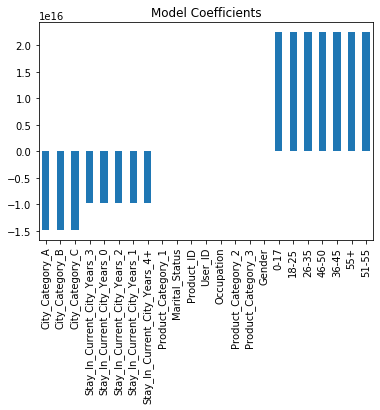

In [34]:

from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [46]:
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [48]:
def evaluate_model(name, model, features, labels):
    pred = model.predict(features)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred),3)
    recall = round(recall_score(labels,pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.15606716343944105

In [51]:
from sklearn.ensemble import  GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6602632803236149

In [52]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.36940771402621175